In [118]:
import glob
import imageio
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

HOLDOUT = 10
R = 0.01

In [119]:
os.chdir("C:\\Users\\Emanuel\\Downloads\\PIC-Eigenfaces Fracionário\\")
os.getcwd()

'C:\\Users\\Emanuel\\Downloads\\PIC-Eigenfaces Fracionário'

In [138]:
files = glob.glob("databases/yalefaces/*")
images_yale = [np.array(imageio.mimread(file))[0] for file in files]
images_yale_resized = [cv2.resize(image, dsize=(28, 23), interpolation=cv2.INTER_CUBIC) for image in images_yale]
images_yale_resized = np.array(images_yale_resized)
images_yale_flatten = [image.flatten() for image in images_yale_resized]
images_yale_flatten = np.array(images_yale_flatten)

In [139]:
Y = [f.split('.')[0] for f in files]

In [180]:
def FPCA(X, r, k):
    X = [np.power(x, r) for x in X]
    X = np.array(X)
    mean_vector = np.mean(X.T, axis = 1)                #cria o vetor medio
    centered_matrix = X - mean_vector                   #cria a matriz de diferencas entre os data points e o vetor medio
    centered_matrix = centered_matrix.astype(None)
    cov_matrix = np.cov(centered_matrix.T)              #matriz de covariancia
    values, vectors = np.linalg.eig(cov_matrix)         #autovalores e autovetores
    return np.real(vectors.T.dot(centered_matrix.T).T)[:,:k]

In [185]:
def AvaliarClassificadores(X, Y):
    scores_1nn = []
    
    for i in range(HOLDOUT):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
        clf_1nn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
        scores_1nn.append(clf_1nn.score(X_test, y_test))

    scores_1nn = np.array(scores_1nn).mean() * 100
    return scores_1nn

In [187]:
acc_yale = []
for n in range(1, 71):
    X_ = FPCA(images_yale_flatten, R, n)
    s = AvaliarClassificadores(X_, Y)
    acc_yale.append(s)

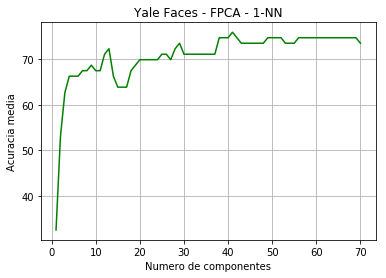

In [188]:
x = np.arange(1, 71)
plt.title("Yale Faces - FPCA - 1-NN")
plt.plot(x, acc_yale, color='green')
plt.ylabel('Acuracia media')
plt.xlabel('Numero de componentes')
plt.grid()
plt.show()